# Online Payments Fraud Detection  
## Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the Online Payment Fraud Detection dataset.

Objectives:
- Understand dataset structure
- Analyze fraud distribution
- Identify correlations
- Visualize feature behavior
- Detect outliers


## 1. Import Libraries and Load Dataset

In this section, we import required Python libraries and load the dataset for analysis.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

# Load dataset
df = pd.read_csv("../data/Online_Payment_Fraud_Detection.csv")

df.head()
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


## 2. Dataset Overview

We examine:
- Dataset shape
- Column information
- Statistical summary
- Data types

In [8]:
print("🔹 Dataset Shape:")
print(df.shape)

print("\n🔹 Column Information:")
df.info()

print("\n🔹 Statistical Summary:")
display(df.describe())


🔹 Dataset Shape:
(6362620, 11)

🔹 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

🔹 Statistical Summary:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 3. Missing Values Check

We check whether the dataset contains any missing (null) values.
Handling missing values is important before model training.

In [9]:
missing_values = df.isnull().sum()

print("🔹 Missing Values in Each Column:")
print(missing_values)

print("\n🔹 Total Missing Values:", missing_values.sum())

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset.")
else:
    print("\n⚠ Missing values detected. Preprocessing required.")


🔹 Missing Values in Each Column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

🔹 Total Missing Values: 0

✅ No missing values found in the dataset.


## 4. Fraud Distribution

In this section, we analyze the distribution of fraudulent and legitimate transactions.

- 0 → Legitimate Transaction
- 1 → Fraudulent Transaction

This helps us understand class imbalance in the dataset.


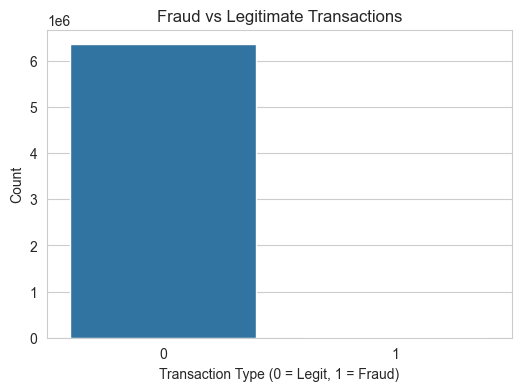

🔹 Fraud Distribution Count:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

🔹 Fraud Percentage:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(6,4))

sns.countplot(x='isFraud', data=df)

plt.title("Fraud vs Legitimate Transactions")
plt.xlabel("Transaction Type (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")

plt.savefig("../reports/screenshots/fraud_distribution.png")
plt.show()

# Print numerical distribution
print("🔹 Fraud Distribution Count:")
print(df['isFraud'].value_counts())

print("\n🔹 Fraud Percentage:")
print(df['isFraud'].value_counts(normalize=True) * 100)


## 5. Correlation Heatmap

In this section, we analyze the correlation between numerical features.

Correlation values range from:
- +1 → Strong positive correlation
- 0 → No correlation
- -1 → Strong negative correlation

This helps us understand relationships between features and their impact on fraud detection.


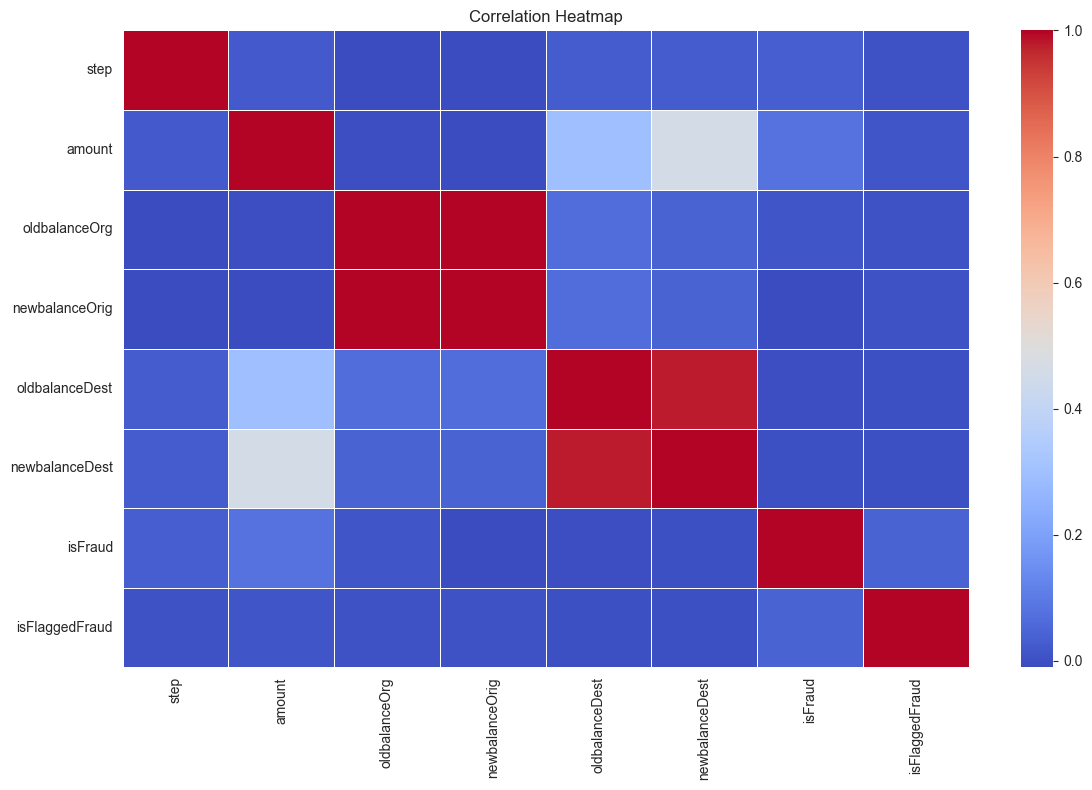

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))

sns.heatmap(numeric_df.corr(), 
            annot=False, 
            cmap='coolwarm',
            linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()

plt.savefig("../reports/screenshots/heatmap.png")
plt.show()


## 6. Histogram Analysis

In this section, we analyze the distribution of numerical features using histograms.

Histograms help us:
- Understand data distribution
- Detect skewness
- Identify outliers
- Observe feature spread

This helps in understanding transaction behavior and fraud patterns.


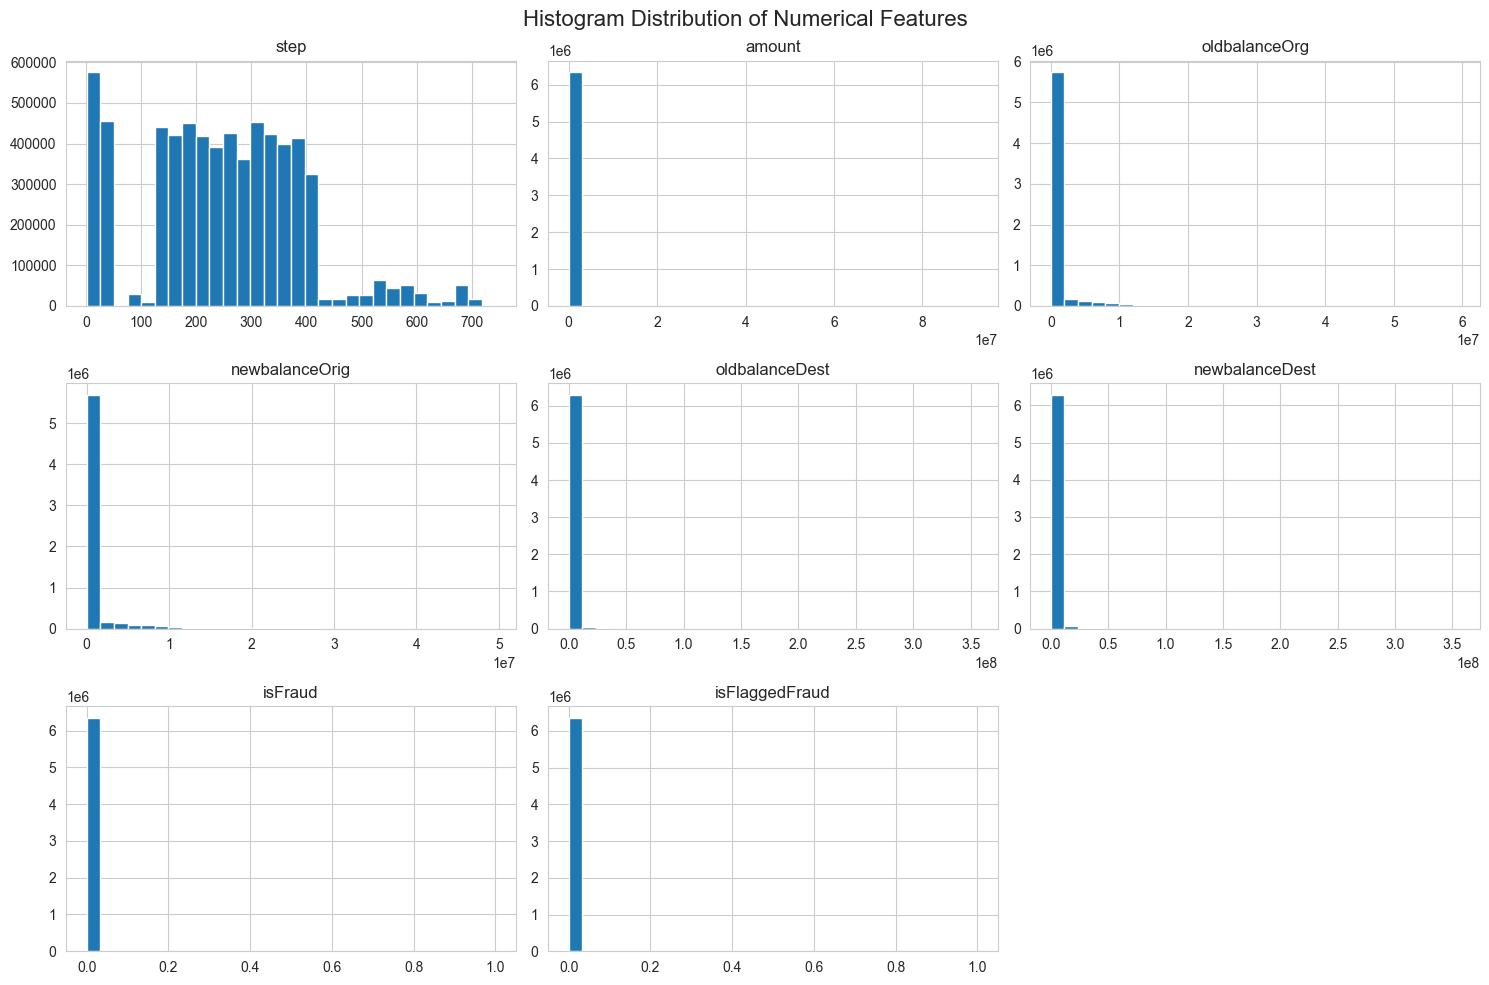

In [13]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,10))

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(numeric_df[column], bins=30)
    plt.title(column)

plt.suptitle("Histogram Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.savefig("../reports/screenshots/histogram.png")
plt.show()


## 7. Boxplot Analysis
Boxplots are used to visualize the distribution and detect outliers in numerical features.  
This helps in understanding skewness and extreme transaction values in the dataset.

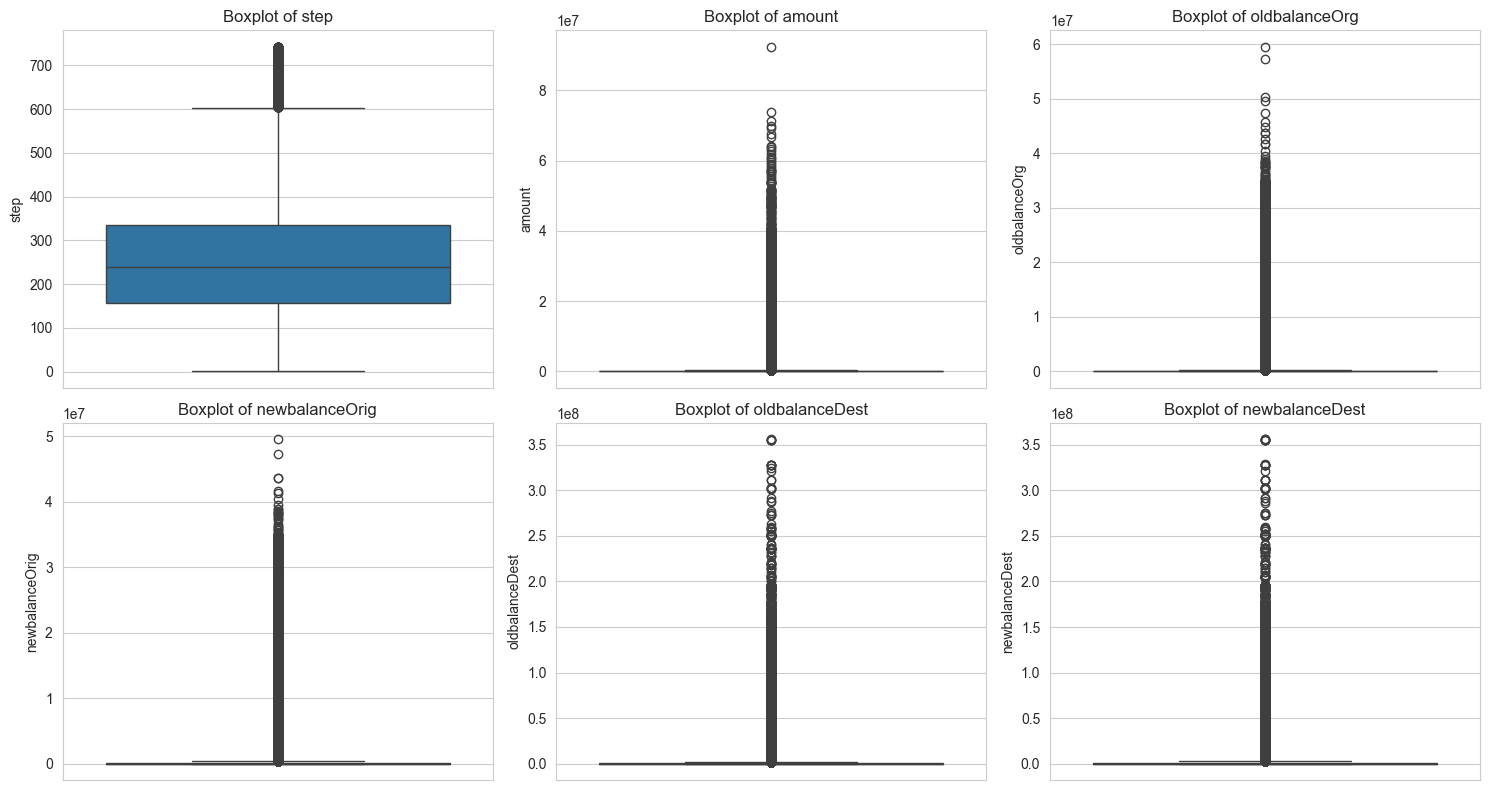

In [15]:
# Select only important numerical features (exclude target columns)
numeric_cols = [
    'step',
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest'
]

plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.savefig("../reports/screenshots/boxplot.png")
plt.show()